In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the CSV file (already done in your code)
#--stepwise
csv_path = "/Users/amirgazar/Documents/GitHub/Decarbonization-Tradeoffs/2 Generation Expansion Model/5 Dispatch Curve/4 Final Results/1 Comprehensive Days Summary Results/Battery_Data.csv"
yearly_results = pd.read_csv(csv_path)

yearly_results = yearly_results[yearly_results['Pathway'] != 'A']
yearly_results['CO2_mtons'] = yearly_results['CO2_tons'] / 1e3

In [6]:
yearly_results

,Year,Simulation,Pathway,RP_mean,RP_max,RP_min,Battery_Discharges_GWh,Shortages_TWh,CO2_tons,CO2_mtons
26,2025,831,B1,0.172235,0.531543,0.015995,36.653287,0.016759,3.335810e+07,33358.101762
27,2026,831,B1,0.197959,0.602947,0.015682,19.747554,0.001677,2.783954e+07,27839.537790
28,2027,831,B1,0.223293,0.623144,0.024852,21.780274,0.003549,2.731450e+07,27314.502278
29,2028,831,B1,0.250272,0.676598,0.020789,36.272697,0.000314,2.657167e+07,26571.665497
30,2029,831,B1,0.275282,0.709697,0.026181,36.876115,0.000072,2.611188e+07,26111.882872
...,...,...,...,...,...,...,...,...,...,...
203,2046,831,D,0.146334,0.463551,0.014951,257.181723,0.008133,3.676427e+07,36764.268195
204,2047,831,D,0.148446,0.473777,0.012939,203.822668,0.007893,3.650927e+07,36509.265473
205,2048,831,D,0.149599,0.452801,0.013973,142.989823,0.002481,3.628623e+07,36286.227644
206,2049,831,D,0.151768,0.449953,0.018261,83.900954,0.000151,3.572961e+07,35729.605949


In [7]:
columns_to_summarize = ['RP_mean', 'Battery_Discharges_GWh', 'Shortages_TWh', 'CO2_mtons']  
yearly_results = yearly_results.groupby(['Pathway', 'Year'])[columns_to_summarize].mean().reset_index()
print(yearly_results.max())

Pathway                              D
Year                              2050
RP_mean                       0.739472
Battery_Discharges_GWh     4315.308289
Shortages_TWh                 0.483307
CO2_mtons                 39620.591241
dtype: object


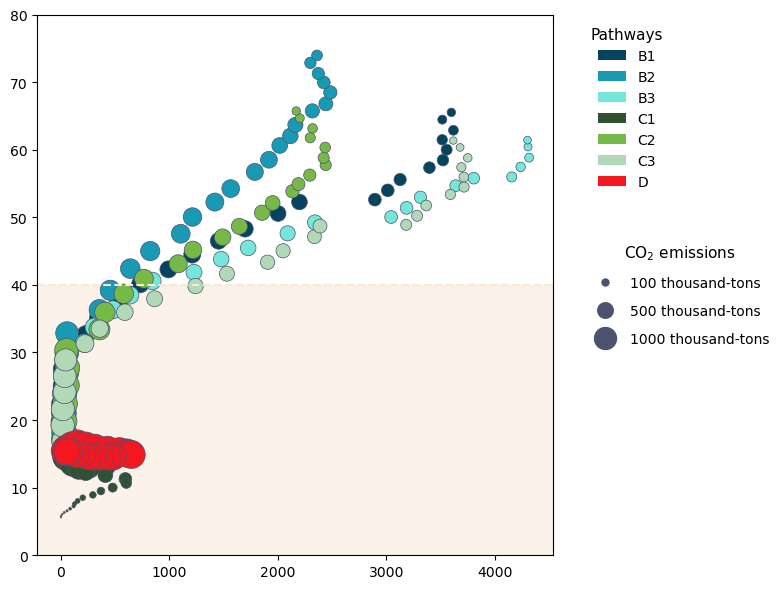

In [8]:
import matplotlib.pyplot as plt
import matplotlib.lines as mlines

# Convert RP_mean to percentages for the y-axis
yearly_results["RP_mean_percent"] = yearly_results["RP_mean"] * 100

# Explicitly define improved pastel colors for each pathway
unique_pathways = yearly_results["Pathway"].unique()
pathway_colors = {
    "A": "grey",
    "B1": "#05445E",  # Muted pastel blue
    "B2": "#189AB4",  # Muted pastel light blue
    "B3": "#75E6DA",  # Muted pastel sky blue
    "C1": "#2F5233",  # Muted pastel lavender
    "C2": "#76B947",  # Muted pastel pink lavender
    "C3": "#B1D8B7",  # Muted pastel light pink
    "D": "#F51720",   # Muted pastel gold
}



# Create the scatter plot
plt.figure(figsize=(8, 6))

# Add light pink shading between 10% and 50% (excluded from legend)
plt.axhspan(0, 40, color="#f9e8d4", alpha=0.5)
# Add a dashed horizontal line at 50% (excluded from legend)
plt.axhline(y=40, color="#f9e8d4", linestyle="--", linewidth=1.5)

for pathway in unique_pathways:
    subset = yearly_results[yearly_results["Pathway"] == pathway]
    plt.scatter(
        subset["Battery_Discharges_GWh"],  # x-axis
        subset["RP_mean_percent"],  # y-axis
        s=subset["CO2_mtons"]*0.01,  # Bubble size
        color=pathway_colors.get(pathway, "#D3D3D3"),  # Default to light gray if not in predefined colors
        edgecolors="#4C5270",  # Edge color
        linewidth=0.5, label=pathway
    )

# Add labels and title
#plt.xlabel("Battery Discharges (TWh)", fontsize=12)
#plt.ylabel("RP Mean (%)", fontsize=12)

# Create custom legends
# Legend for colors (pathways)
from matplotlib.patches import Patch

color_legend_labels = [
    Patch(facecolor=pathway_colors[pathway], label=pathway)
    for pathway in unique_pathways
]


# Legend for bubble sizes
bubble_sizes = [100, 500, 1000]  # Example bubble sizes in mtons
scaling_factor = 0.25  # Ensure this matches the scale factor used in `s`
bubble_legend_labels = [
    mlines.Line2D(
        [], [], color='#4C5270', marker='o', linestyle='None',
        markersize=(size * scaling_factor)**0.5,  # Correct for area scaling
        label=f"{size} thousand-tons"
    )
    for size in bubble_sizes
]

# Add legends
color_legend = plt.legend(handles=color_legend_labels, title="Pathways", fontsize=10,
                          title_fontsize=11, loc="upper left", bbox_to_anchor=(1.05, 1), frameon=False)
plt.gca().add_artist(color_legend)

bubble_legend = plt.legend(handles=bubble_legend_labels, title="CO$_2$ emissions", fontsize=10,
                           title_fontsize=11, loc="upper left", labelspacing=1, bbox_to_anchor=(1.05, 0.6), 
                           frameon=False)

# Set y-axis limits and remove grid lines
plt.ylim(0, 80)
plt.grid(False)

# Adjust layout to make space for the legends
plt.tight_layout()
plt.savefig('Energy_storage.svg', dpi=300, bbox_inches='tight')
plt.show()
